## Titanic - Machine Learning from Disaster

## Information:

This project is a kaggle compettion 

In this project we analyse passengers from the titanic features to determine their survival probability. i.e. given features, we predict whether a passenger will survive on the titanic.  

Data description:

    survival: Survival class of the passenger; 0 = No, 1 = Yes
    pclass: Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd
    sex: sex
    Age: Age in years
    sibsp: # of siblings / spouses aboard the Titanic
    parch: # of parents / children aboard the Titanic
    ticket: Ticket number
    fare: Passenger fare
    cabin: Cabin number
    embarked: Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib %inline

# Exploratory Data Analysis (EDA)

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# getting info abt the 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Checking total number of null values per features
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.shape

(891, 12)

In [7]:
# Let's see the null values of the above dataset in terms of the percentage 

print("Checking the Null or na percentage")
((train.isnull() | train.isna()).sum()*100 / train.index.size)

Checking the Null or na percentage


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
# More info about the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization

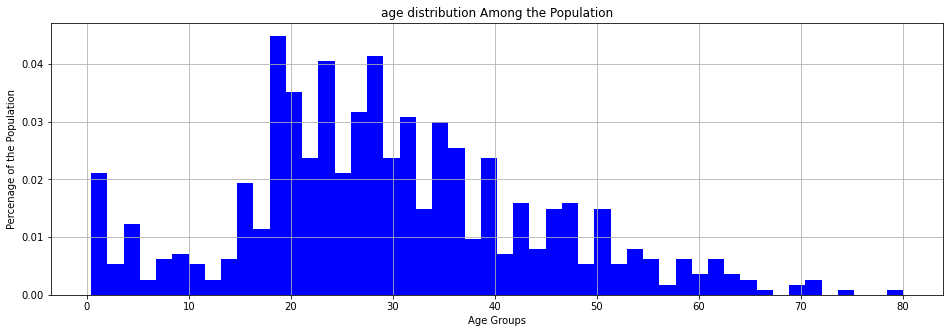

In [9]:
# age distribution Among the Population

ages = train['Age'].dropna().tolist()

plt.figure(figsize=(16, 5))
plt.hist(ages, histtype='bar', color='blue', bins=50, density=True)
plt.xlabel('Age Groups')
plt.ylabel('Percenage of the Population')
plt.title('age distribution Among the Population')
plt.grid(True)

/home/daryl-loyck/anaconda3/envs/dlwithpy/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution Among the Population')

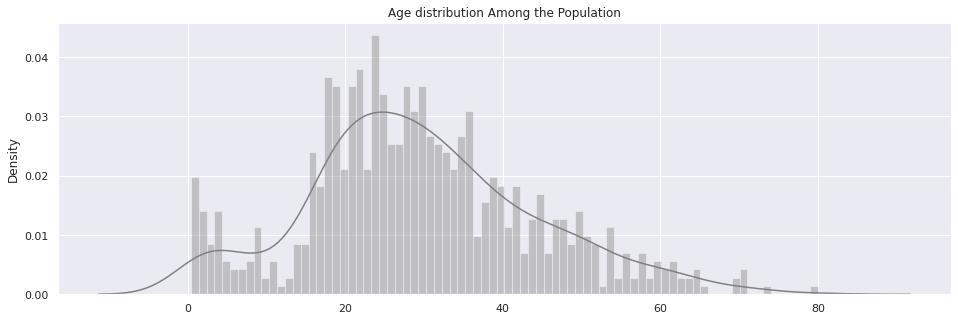

In [11]:
# seaborn

sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(16,5)})

sns.distplot(a = ages, bins = 80, color = 'gray', vertical = False).set_title('Age distribution Among the Population')

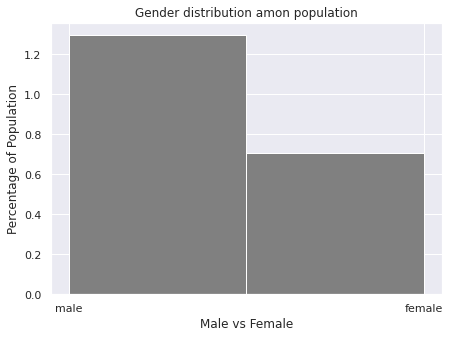

In [13]:
# Gender distribution amon population
sex = train['Sex'].dropna().tolist()
plt.figure(figsize=(7,5))
plt.hist(sex, histtype='bar', color='gray', bins=2, density=True)
plt.xlabel('Male vs Female')
plt.ylabel('Percentage of Population')
plt.title('Gender distribution amon population')
plt.grid(True)

Text(0.5, 1.0, 'Gender distribution amon population')

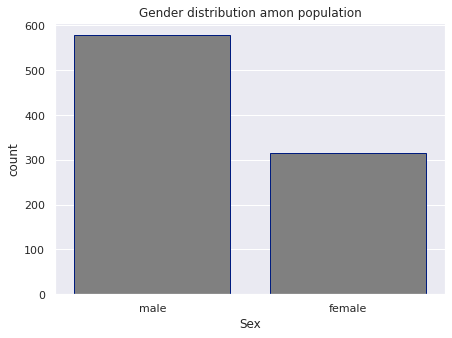

In [16]:
# seaborn
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(7,5)})

sns.countplot(data=train,  x= 'Sex', color='gray', edgecolor=sns.color_palette('dark', 1),label='Count').set_title('Gender distribution among population')

Text(0.5, 1.0, 'Gender distribution according to Passenger Class')

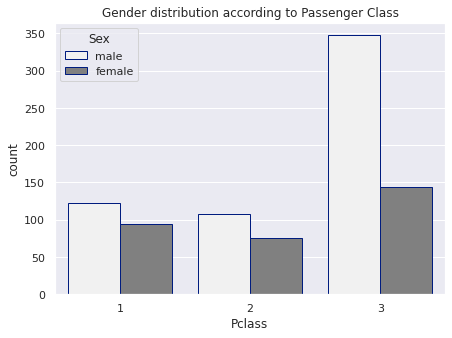

In [20]:
# Gender distribution according to Passenger Class
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(7,5)})

sns.countplot(x= 'Pclass', hue='Sex', data=train, color='gray', edgecolor=sns.color_palette('dark', 1)).set_title('Gender distribution according to Passenger Class')

Text(0.5, 1.0, 'Gender distribution among the survival')

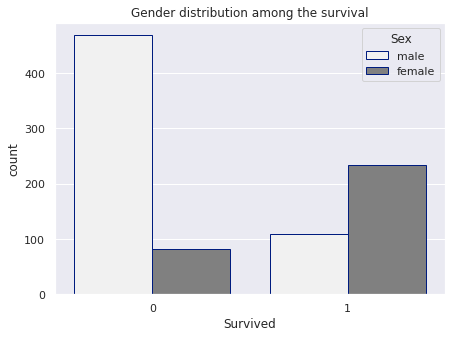

In [22]:
# Gender distribution among the survival

sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(7,5)})

sns.countplot(x= 'Survived', hue='Sex', data=train, color='gray', edgecolor=sns.color_palette('dark', 1)).set_title('Gender distribution among the survived ')

Text(0.5, 1.0, 'Gender distribution among the survived ')

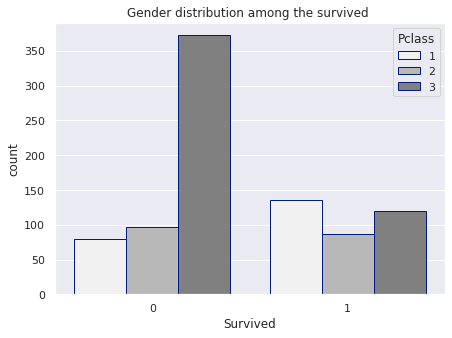

In [23]:
# Survival distribution among different classes

sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(7,5)})

sns.countplot(x= 'Survived', hue='Pclass', data=train, color='gray', edgecolor=sns.color_palette('dark', 1)).set_title('Gender distribution among the survived ')

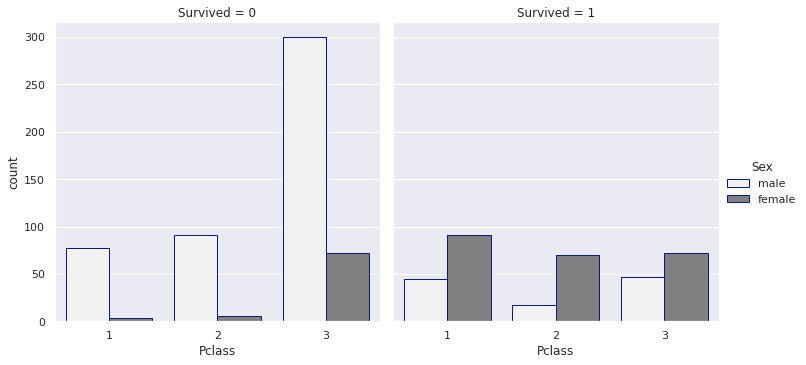

In [28]:
# Passenger survival distribution of population with respect to gender and class
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(12,5)})

sns.catplot(x='Pclass', hue='Sex', col='Survived', data=train, kind='count', color='gray', edgecolor=sns.color_palette('dark', 1))

Text(0.5, 1.0, 'Distribution of the number of Family Member Aboard')

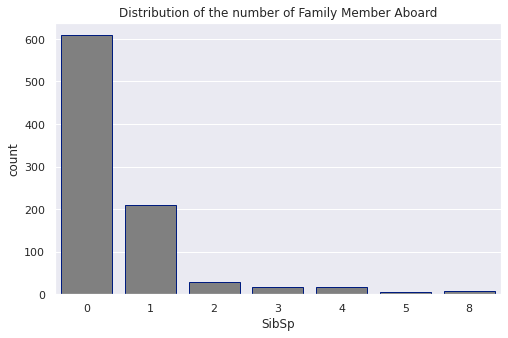

In [29]:
# Distribution of the number of Family Member Aboard

sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(x= 'SibSp', data=train, color='gray', edgecolor=sns.color_palette('dark', 1)).set_title('Distribution of the number of Family Member Aboard')

Text(0.5, 1.0, 'Distribution of the population with Different Number of Family Members aboard grouped by gender')

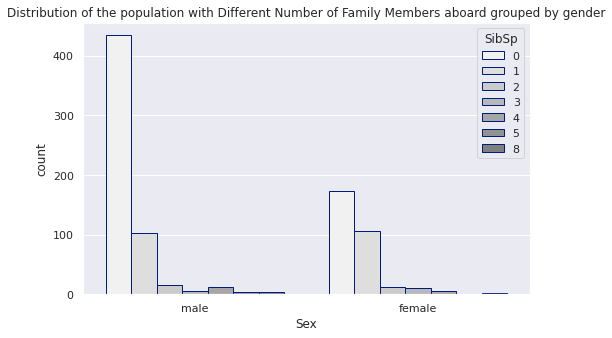

In [30]:
# Distribution of the population with Different Number of Family Members aboard grouped by gender

sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(x= 'Sex', hue='SibSp', data=train, color='gray', edgecolor=sns.color_palette('dark', 1)).set_title('Distribution of the population with Different Number of Family Members aboard grouped by gender')

Text(0.5, 1.0, 'Visualizing embarked port according to class population')

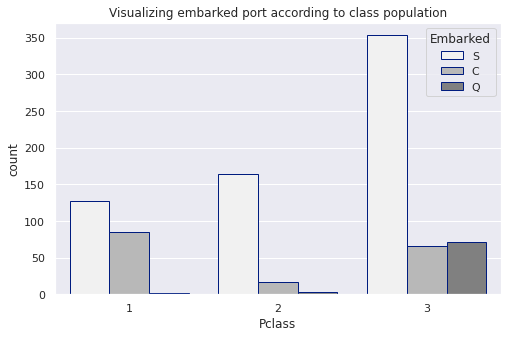

In [31]:
# Visualizing embarked port according to class population

sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(x= 'Pclass', hue='Embarked', data=train, color='gray', edgecolor=sns.color_palette('dark', 1)).set_title('Visualizing embarked port according to class population')

### Feature Engineering

In [32]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train['Name'].unique().tolist()

',
 'Panula, Mr. Ernesti Arvid',
 'Persson, Mr. Ernst Ulrik',
 'Graham, Mrs. William Thompson (Edith Junkins)',
 'Bissette, Miss. Amelia',
 'Cairns, Mr. Alexander',
 'Tornquist, Mr. William Henry',
 'Mellinger, Mrs. (Elizabeth Anne Maidment)',
 'Natsch, Mr. Charles H',
 'Healy, Miss. Hanora "Nora"',
 'Andrews, Miss. Kornelia Theodosia',
 'Lindblom, Miss. Augusta Charlotta',
 'Parkes, Mr. Francis "Frank"',
 'Rice, Master. Eric',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Duane, Mr. Frank',
 'Olsson, Mr. Nils Johan Goransson',
 'de Pelsmaeker, Mr. Alfons',
 'Dorking, Mr. Edward Arthur',
 'Smith, Mr. Richard William',
 'Stankovic, Mr. Ivan',
 'de Mulder, Mr. Theodore',
 'Naidenoff, Mr. Penko',
 'Hosono, Mr. Masabumi',
 'Connolly, Miss. Kate',
 'Barber, Miss. Ellen "Nellie"',
 'Bishop, Mrs. Dickinson H (Helen Walton)',
 'Levy, Mr. Rene Jacques',
 'Haas, Miss. Aloisia',
 'Mineff, Mr. Ivan',
 'Lewy, Mr. Ervin G',
 'Hanna, Mr. Mansour',
 'Allison, Miss. Helen Loraine',
 'Saalfeld, Mr. Adolphe',
 

In [37]:
titles = ['Mrs', 'Mr', 'Don', 'Jonkheer', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle', 'Col', 'Capt', 'Mme', 'Countess']

def get_title(name):
    for title in titles:
        if title in name:
            return title
    return 'None'

print(get_titles('Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'))
print(get_titles('Williams, Mr. Charles Eugene'))

Mrs
Mr


In [38]:
train['Title'] = train['Name'].apply(lambda x: get_title(x))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [39]:
train['Age'].mean()

29.69911764705882

In [41]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [42]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64

In [45]:
train.dropna(inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [63]:
x_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
y_train = train['Survived']

In [64]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [65]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [66]:
x_train = pd.get_dummies(x_train)
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Jonkheer,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,3,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [67]:
x_train.columns.values

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Capt',
       'Title_Col', 'Title_Countess', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Major', 'Title_Master', 'Title_Miss',
       'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'Title_Rev'], dtype=object)

## Building the Model

In [68]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### 1. Random Forest

In [69]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

random_forest_score = round(random_forest.score(x_train, y_train) * 100, 2)

random_forest_score = round(random_forest.score(x_train, y_train) * 100, 2)
print('Random Forest Score: ', random_forest_score)

Random Forest Score:  98.54


In [70]:
test = pd.read_csv('test.csv')
test['Title'] = test['Name'].apply(lambda x: get_title(x))
test['Age'].fillna(test['Age'].mean(), inplace = True)
test.drop('Cabin', axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [71]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
dtype: int64

In [72]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [73]:
x_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


In [74]:
x_test = pd.get_dummies(x_test)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Sex_female    418 non-null    uint8  
 6   Sex_male      418 non-null    uint8  
 7   Embarked_C    418 non-null    uint8  
 8   Embarked_Q    418 non-null    uint8  
 9   Embarked_S    418 non-null    uint8  
 10  Title_Col     418 non-null    uint8  
 11  Title_Don     418 non-null    uint8  
 12  Title_Dr      418 non-null    uint8  
 13  Title_Master  418 non-null    uint8  
 14  Title_Miss    418 non-null    uint8  
 15  Title_Mr      418 non-null    uint8  
 16  Title_Mrs     418 non-null    uint8  
 17  Title_Rev     418 non-null    uint8  
dtypes: float64(2), int64(3), uint8

In [75]:
total_titles = train['Title'].unique().tolist()
test_titles = test['Title'].unique().tolist()

for title in total_titles:
    if title not in test_titles:
        print('Title ' + str(title) + ' not in the Test Set')
        x_test['Title_' + str(title)] = 0

Title Mme not in the Test Set
Title Ms not in the Test Set
Title Major not in the Test Set
Title Mlle not in the Test Set
Title Capt not in the Test Set
Title Countess not in the Test Set
Title Jonkheer not in the Test Set


In [76]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Sex_female      418 non-null    uint8  
 6   Sex_male        418 non-null    uint8  
 7   Embarked_C      418 non-null    uint8  
 8   Embarked_Q      418 non-null    uint8  
 9   Embarked_S      418 non-null    uint8  
 10  Title_Col       418 non-null    uint8  
 11  Title_Don       418 non-null    uint8  
 12  Title_Dr        418 non-null    uint8  
 13  Title_Master    418 non-null    uint8  
 14  Title_Miss      418 non-null    uint8  
 15  Title_Mr        418 non-null    uint8  
 16  Title_Mrs       418 non-null    uint8  
 17  Title_Rev       418 non-null    uin

In [77]:
Survived = random_forest.predict(x_test)
Survived

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Sample Submission File

In [78]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [79]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Generating submission file

In [80]:
output =  pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': Survived})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [81]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [82]:
output.to_csv('Submission_RandomForest.csv', index=False)